In [ ]:
'''
Bienvenue sur ce notebook.
J'ai codé un SMA Covid.
Les résultats de la simulation arrivent dans le fichier log.txt

Les paramètres utilisés sont dans le fichier config.txt





'''

In [1]:
!g++ -O2 -c Position.cpp Human.cpp RandMT.cpp World.cpp main.cpp

In [2]:
!g++ -O2 Human.o main.o Position.o RandMT.o World.o -o exe

In [ ]:
!./exe

In [14]:
listNumIteration = []
listNbNouvCas = []
listNbPersonneHosp = []
listNbPersonneRea = []
listNbNouvHosp = []
listNbNouvRea = []
listNbNouvMort = []
nbCasCovidConnuTotal = 0
listAgeMort = []
listAgeNouvCasSymptomatique = []


f = open("log.txt", "r")
fileLines = f.readlines()
i = 0
for line in fileLines:
    if("##" not in line):
        if(i == 0):
            listNumIteration.append(int(line))
            i = i + 1
        elif(i==1):
            listNbNouvCas.append(int(line))
            i = i + 1
        elif(i==2):
            listNbPersonneHosp.append(int(line))
            i = i + 1
        elif(i==3):
            listNbPersonneRea.append(int(line))
            i = i + 1
        elif(i==4):
            listNbNouvHosp.append(int(line))
            i = i + 1
        elif(i==5):
            listNbNouvRea.append(int(line))
            i = i + 1
        elif(i==6):
            listNbNouvMort.append(int(line))
            i = i + 1
        elif(i==7):
            nbCasCovidConnuTotal = (int(line))
            i = i + 1
        elif("AgeC:" in line):
            listSplit = line.split(":")
            listAgeNouvCasSymptomatique.append(int(listSplit[1]))
        elif("AgeD:" in line):
            listSplit = line.split(":")
            listAgeMort.append(int(listSplit[1]))
    else:
        i = 0
        


[0, 2727, 3111, 3529, 4028, 4240, 4049, 3936, 3600, 3145, 2608, 2498, 2269, 2039, 1853, 1600, 1430, 1252, 1070, 961, 817, 744, 635, 561, 470, 431, 383, 335, 266, 236, 226, 220, 170, 144, 103, 103, 73, 85, 69, 53, 40, 49, 34, 31, 26, 24, 23, 23, 22, 14, 15, 14, 12, 12, 7, 6, 4, 2, 4, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#####
[0, 0, 1836, 274, 316, 336, 395, 399, 405, 371, 354, 302, 240, 229, 201, 189, 189, 148, 135, 94, 85, 98, 70, 67, 48, 42, 40, 40, 35, 16, 23, 21, 37, 21, 15, 19, 10, 10, 6, 6, 10, 2, 2, 1, 2, 3, 2, 1, 4, 1, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

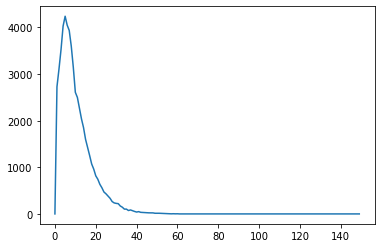

In [15]:
import matplotlib.pyplot as plt
import numpy as np

#print(listNumIteration)
print(listNbNouvCas)
print("#####")
print(listNbNouvHosp)
print("#####")
print(listNbNouvRea)
print("#####")
print(listNbNouvMort)
print("#####")
print(nbCasCovidConnuTotal)
print("#####")
print(listAgeMort)
plt.plot(listNumIteration, listNbNouvCas)  # Matplotlib plot.

#plt.plot(listNumIteration, listNbNouvHosp)

#plt.plot(listNumIteration, listNbNouvRea)

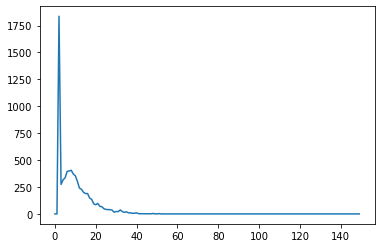

In [16]:
plt.plot(listNumIteration, listNbNouvHosp)



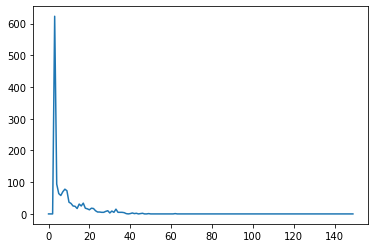

In [17]:
plt.plot(listNumIteration, listNbNouvRea)

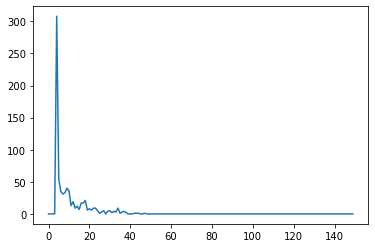

In [18]:
plt.plot(listNumIteration, listNbNouvMort)

In [19]:
nbMortTotal = sum(listNbNouvMort)
tauxDeMortCasConnu = (nbMortTotal / nbCasCovidConnuTotal) * 100

print("Le taux de mort de cas connu est de : " + str(tauxDeMortCasConnu) + "%")

## IL ME FAUT L'AGE DES GENS CONTAMINE AUSSI ... 

Le taux de mort de cas connu est de : 1.2521218844014186%


In [20]:
nbAge0 = 0
nbAge1 = 0
nbAge2 = 0
nbAge3 = 0
nbAge4 = 0
nbAge5 = 0
nbAge6 = 0
nbAge7 = 0

for i in listAgeNouvCasSymptomatique:
    if i == 0:
        nbAge0 = nbAge0 + 1
    elif i == 1:
        nbAge1 = nbAge1 + 1
    elif i == 2:
        nbAge2 = nbAge2 + 1
    elif i == 3:
        nbAge3 = nbAge3 + 1
    elif i == 4:
        nbAge4 = nbAge4 + 1
    elif i == 5:
        nbAge5 = nbAge5 + 1
    elif i == 6:
        nbAge6 = nbAge6 + 1
    elif i == 7:
        nbAge7 = nbAge7 + 1

        
nbAgeMort0 = 0
nbAgeMort1 = 0
nbAgeMort2 = 0
nbAgeMort3 = 0
nbAgeMort4 = 0
nbAgeMort5 = 0
nbAgeMort6 = 0
nbAgeMort7 = 0

for i in listAgeMort:
    if i == 0:
        nbAgeMort0 = nbAgeMort0 + 1
    elif i == 1:
        nbAgeMort1 = nbAgeMort1 + 1
    elif i == 2:
        nbAgeMort2 = nbAgeMort2 + 1
    elif i == 3:
        nbAgeMort3 = nbAgeMort3 + 1
    elif i == 4:
        nbAgeMort4 = nbAgeMort4 + 1
    elif i == 5:
        nbAgeMort5 = nbAgeMort5 + 1
    elif i == 6:
        nbAgeMort6 = nbAgeMort6 + 1
    elif i == 7:
        nbAgeMort7 = nbAgeMort7 + 1
    

In [22]:
print("Le taux de mortalité pour les 0 - 15 ans est de : " + str( (nbAgeMort0/nbAge0) * 100) + "%") 
print("Le taux de mortalité pour les 15 - 25 ans est de : " + str( (nbAgeMort1/nbAge1) * 100) + "%") 
print("Le taux de mortalité pour les 25 - 35 ans est de : " + str( (nbAgeMort2/nbAge2) * 100) + "%") 
print("Le taux de mortalité pour les 35 - 45 ans est de : " + str( (nbAgeMort3/nbAge3) * 100) + "%") 
print("Le taux de mortalité pour les 45 - 55 ans est de : " + str( (nbAgeMort4/nbAge4) * 100) + "%") 
print("Le taux de mortalité pour les 55 - 65 ans est de : " + str( (nbAgeMort5/nbAge5) * 100) + "%") 
print("Le taux de mortalité pour les 65 - 75 ans est de : " + str( (nbAgeMort6/nbAge6) * 100) + "%") 
print("Le taux de mortalité pour les 75 + ans est de : " + str( (nbAgeMort7/nbAge7) * 100) + "%") 

Le taux de mortalité pour les 0 - 15 ans est de : 0.0%
Le taux de mortalité pour les 15 - 25 ans est de : 0.041684035014589414%
Le taux de mortalité pour les 25 - 35 ans est de : 0.07387706855791962%
Le taux de mortalité pour les 35 - 45 ans est de : 0.17303340875815254%
Le taux de mortalité pour les 45 - 55 ans est de : 0.6050463439752832%
Le taux de mortalité pour les 55 - 65 ans est de : 1.4758675708017552%
Le taux de mortalité pour les 65 - 75 ans est de : 3.2801685224195007%
Le taux de mortalité pour les 75 + ans est de : 6.275924256086564%
